Note: this code is taken verbatim from the eleanor quickstart tutorial (found [here](https://adina.feinste.in/eleanor/getting_started/tutorial.html)) unless otherwise stated; I'm just checking that eleanor is behaving as expected. I will make note of any discrepancies.

## 1.1 Fast Light Curves

In [1]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
star = eleanor.Source(tic=38846515, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
Found TIC 38846515 (Gaia 4675352109658261376), with TESS magnitude 10.3157, RA 68.9597092399964, and Dec -64.0270368810381


In [4]:
star = eleanor.Source(name='WASP-100', sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

coords = (68.959732, -64.02704)
# or
coords = SkyCoord(ra=68.959732, dec=-64.02704, unit=(u.deg, u.deg))

star = eleanor.Source(coords=coords, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

star = eleanor.Source(gaia=4675352109658261376, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
Found TIC 38846515 (Gaia 4675352109658261376), with TESS magnitude 10.3157, RA 68.95970916666666, and Dec -64.02703666666666
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_

In [5]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|█████████████████████████████████████████████████████████████████████████████| 1282/1282 [00:04<00:00, 303.67it/s]


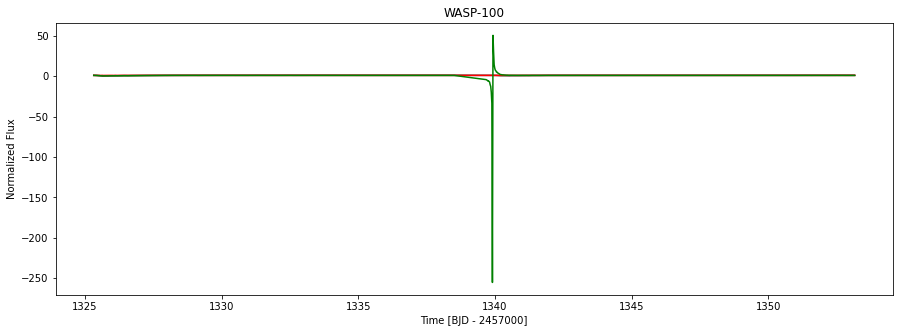

In [6]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-100');

The above plot is markedly different from the expected plot and suggests that eleanor may somehow be identifying the wrong object. The expected plot is as follows:

![correctplot](./quickstartPlots/screenshot_718.png)

In [7]:
data.bkg_type

'TPF_LEVEL'

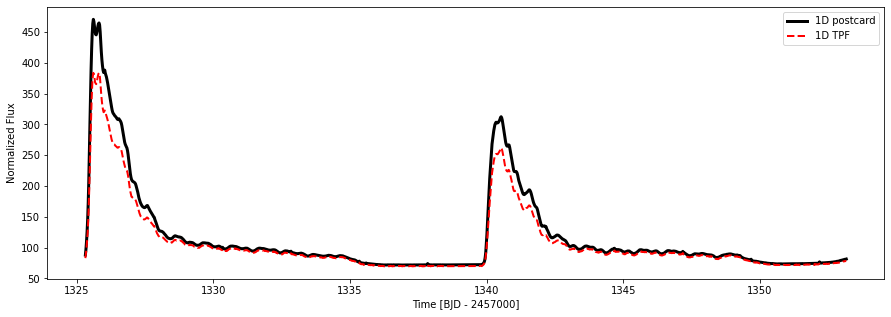

In [8]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

This plot differs again, both being slightly lower in magnitude and having a different 1D TPF. The correct plot is as follows:

![correctplot](./quickstartPlots/screenshot_719.png)

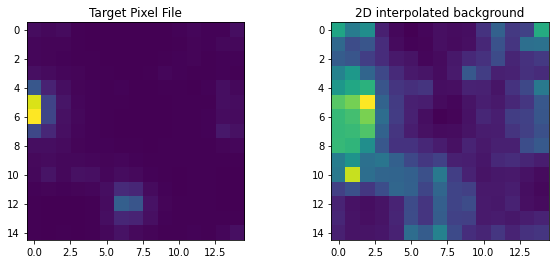

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

For some reason eleanor seems to be looking at the wrong patch of sky; the objects in this TPF are entirely different from what was intended. The correct plot is as follows:

![correctplot](./quickstartPlots/screenshot_720.png)

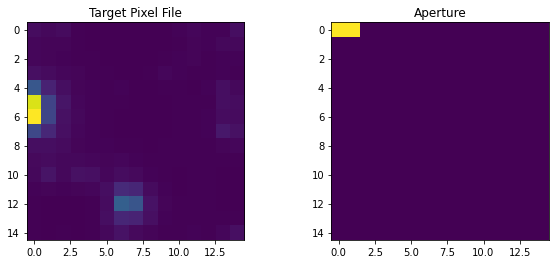

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

The aperture demonstrates the same odd behavior I encountered when investigating ASASSN-18tb in that it seems to set the aperture to the upper left hand corner. The correct plot is as follows:

![correctplot](./quickstartPlots/screenshot_721.png)

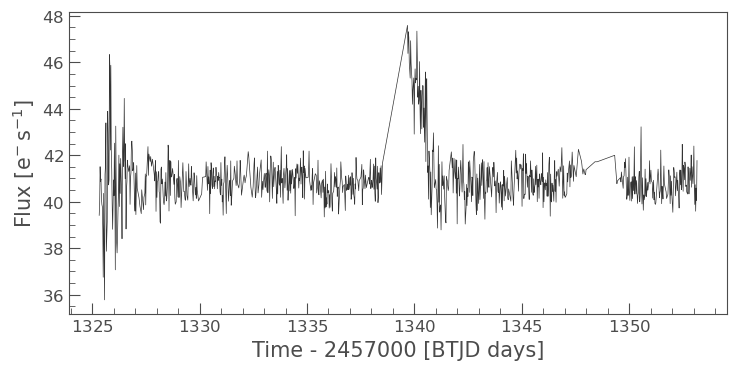

In [11]:
lk = data.to_lightkurve()
lk.plot()

Again, this demonstrates that the object identified by eleanor is not the same as the one found in the quickstart guide. The correct plot is as follows:

![correctplot](./quickstartPlots/screenshot_722.png)

## 1.2 Stars Observed in Multiple Sectors

In [12]:
star = eleanor.multi_sectors(tic=38846515, sectors=[1,2])

INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
INFO: Found cached file C:\Users\Tyler\.eleanor/mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0002-4-1-cal-1490-0646_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0002-4-1-cal-1490-0646_tess_v2_bkg.fits with expected size 76677120. [astroquery.query]
INFO: Foun

In [13]:
print(star)

[<eleanor.source.Source object at 0x0000019F4F6FA608>, <eleanor.source.Source object at 0x0000019F3080A788>]


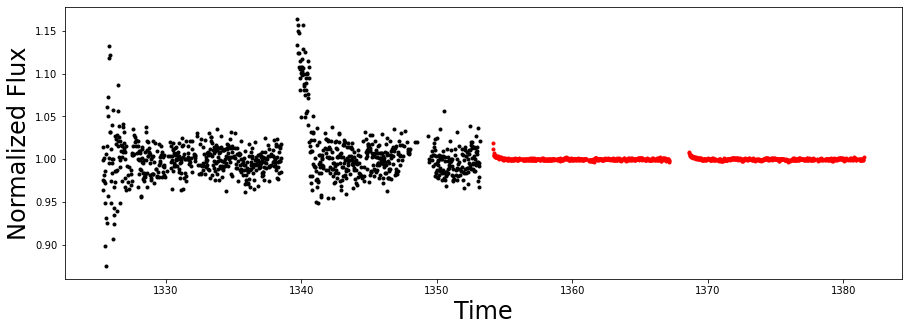

In [14]:
plt.figure(figsize=(15,5))

data = []
plot_fmt = ['k.', 'r.']

for s in star:
    datum = eleanor.TargetData(s, height=15, width=15, bkg_size=31, do_psf=False, do_pca=False)
    data.append(datum)

for sector, datum in enumerate(data):
    q = datum.quality == 0
    plt.plot(datum.time[q], datum.corr_flux[q]/np.median(datum.corr_flux[q]), plot_fmt[sector])

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)

plt.show()

Even when using eleanor's multi-sector utility, the same issue with identifying the correct object occurs. This makes sense, as multi_sectors() just runs the Source() function for each sector. The correct plot is as follows:

![correctplot](./quickstartPlots/screenshot_723.png)

Overall, it seems that eleanor is having an issue with identifying the correct sources when searching for targets. I am unsure if this is a result of the local cached files, as this behavior began to occur without me modifying any of the files or downloading new files. If that is the issue, it should be fixed by simply purging the cached files and redownloading them. 

Alternatively, there could be an issue with my version of eleanor, as I have the most recent development version installed. This is more doubtful than the previous possibility, as I hadn't updated eleanor or any python package prior to eleanor behaving like this. If purging the cached files doesn't work, I will try to create an environment specifically for eleanor.